In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!curl --header "Host: storage.googleapis.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/6277/323734/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1604545268&Signature=PzbmwPU4S82Y6qgBiJNTc8VJP%2FaZ5Y0ymb%2F5KPOABfUiulWHHXST1TxYyNcZx1P6mD5Nu14uqCJ8wfyRWcQPnQSnEurQbVd%2FJCTkIzgMMVZ9b3RI8jzjlBwRkga3kt3NnzBMr41Uz%2BWaslTPiiitTJK2Sv0jR8yaGpF0PcrwJ3XUr%2B7QzSguPbt75%2FudBQ%2F2t60iQZfTWw1sIPvqweICIqADMfjtbmcmcq5IF5un4XEkY4jiBrbq5pJcOu1yMg2rHMuJKUxoa9Nmt7aAiG1%2F1uzuQC%2Fu15RbJaFNbB5hB00lWZP%2BAyyNPQtUsYtmyt2WEZZiYh7UQNxSY2FSDtG5og%3D%3D&response-content-disposition=attachment%3B+filename%3Dquora-question-pairs.zip" -L -o 'quora-question-pairs.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  308M  100  308M    0     0  84.6M      0  0:00:03  0:00:03 --:--:-- 84.6M


In [ ]:
!unzip /content/quora-question-pairs.zip

Archive:  /content/quora-question-pairs.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
!unzip test.csv.zip


Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                


In [ ]:
!pip  install distance

A
     |████████████████████████████████| 184kB 4.7MB/s 
  Created wheel for distance: filename=Distance-0.1.3-cp36-none-any.whl size=16262 sha256=194caec3b922d3358b4f1253c7fe4a2ea5c2a19896ccfc5cb7a96c55a68134bb
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built distance


In [ ]:
!pip install fuzzywuzzy

In [ ]:
!pip install beautifulsoup4

In [ ]:
!pip install wordcloud


<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

3.2.1   2.2.1 Type of Machine Leaning Problem

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

<h1>3. Exploratory Data Analysis </h1>

In [ ]:
import pandas as pd#manipulation of df
import numpy as np#numerical operatios

import matplotlib.pyplot as plt#plotting
import seaborn as sns#plotting.
%matplotlib inline# will lead to static images of your plot embedded in the notebook.
import plotly.offline as py#Plotly allows you to generate graphs offline and save them in local machine
py.init_notebook_mode(connected=True)#for ploting the grphs.
import plotly.graph_objs as go#plotting
import plotly.tools as tls

import os# If you just want to read or write a file 
from os import path#file manipulation.
import gc#Python’s memory allocation and deallocation method is automatic with two strategies Reference counting
#Garbage collection

import re#regular expression
import nltk#library for NLP tasks.
from nltk.corpus import stopwords#NLP tasks stop words 
import distance## This package is used for finding longest common subsequence between two strings.
from nltk.stem import PorterStemmer#stemming operation on tokens
from bs4 import BeautifulSoup#parsing HTML and XML documents.
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

from tqdm import tqdm#progress bar of itration.
from tqdm import tqdm_notebook as tqdm1#progress bar of operation.

import warnings#ignore warnings.
warnings.filterwarnings("ignore")#ignore warnings.

from fuzzywuzzy import fuzz#fuzz features from string.
from sklearn.manifold import TSNE#data visualization in lower dimenssion.

# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS#word cloud 

from PIL import Image#import images
from sklearn.manifold import TSNE
#nltk.download()

UsageError: unrecognized arguments: will lead to static images of your plot embedded in the notebook.


In [ ]:
data=pd.read_csv("train.csv")#read train file.

In [ ]:
data.head()#view the file content.

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
print("total question pair in data:\n {}".format(len(data)))

total question pair in data:
 404290


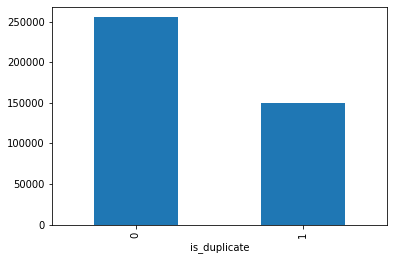

In [ ]:
data.groupby("is_duplicate")["id"].count().plot.bar()#check for class imbalance.

# Observation:The class distribution is fairly balanced.

In [ ]:
data.info()#information regarding dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


## Observation: question1 and question2 is having one an two null values respectively..


In [ ]:
data["qid1"].value_counts()#count ferquency of each value.

8461      50
14110     48
25984     47
20628     47
1749      47
          ..
415339     1
411241     1
413288     1
409190     1
524288     1
Name: qid1, Length: 290654, dtype: int64

In [ ]:
data["qid2"].value_counts()#count ferquency of each value.

30782     120
2559      115
4044      100
2561       71
17978      66
         ... 
99475       1
105616      1
85130       1
525311      1
288755      1
Name: qid2, Length: 299364, dtype: int64

In [ ]:
#add two ids of question sets 
qid1_2=pd.Series(data["qid1"].tolist()+data["qid2"].tolist())
print("\033[1m1)Number of unique questions :{}".format(len(np.unique(qid1_2))))
print("2)Duplicate_questions (is_duplicate=1): {}%".format(round(data["is_duplicate"].mean()*100,2)))
print("3)unique_questions    (is_duplicate=0): {}%".format(100-round(data["is_duplicate"].mean()*100,2)))
print("4)number of questions repeted more then one time :{}".format(np.sum(qid1_2.value_counts()>1)))
print("5)maximun time the single question repeated : {}".format(max(qid1_2.value_counts())))

1)Number of unique questions :537933
2)Duplicate_questions (is_duplicate=1): 36.92%
3)unique_questions    (is_duplicate=0): 63.08%
4)number of questions repeted more then one time :111780
5)maximun time the single question repeated : 157


In [ ]:
#find NAN values if any in dataset.
nan_rows=data[data.isnull().any(1)]
nan_rows

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [ ]:
# Filling the null values with ' '
data = data.fillna('')#replace the null values with no space.
nan_rows = data[data.isnull().any(1)]
nan_rows

,id,qid1,qid2,question1,question2,is_duplicate


# Basic Feature Extraction: 
Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2

In [ ]:
data.columns#columns in datset.

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [ ]:
import os
if os.path.isfile("df_features_without_preprocessing_train.csv"):
    df=pd.read_csv("df_features_without_preprocessing_train.csv",encoding="latin-1")
else:
    data["freq_qid1"]=data.groupby("qid1")["qid1"].transform("count")#frequency of qid1
    data["freq_qid2"]=data.groupby("qid2")["qid2"].transform("count")#frequency of qid2
    
    data["q1len"]=data["question1"].str.len()#length of q1
    data["q2len"]=data["question2"].str.len()#length of q2
    
    data["q1_n_words"]=data["question1"].apply(lambda row:len(row.split(" ")))#number of words in q1
    data["q2_n_words"]=data["question2"].apply(lambda row:len(row.split(" ")))#number of words in q1
  
    def normalized_word_Common(row):
        w1=set(map(lambda word:word.lower().strip(), row["question1"].split(' ')))#convert all into lower case and split all words in q1
        w2=set(map(lambda word:word.lower().strip(), row["question2"].split(' ')))#convert all into lower case and split all words in q2
        common=(w1).intersection(w2)#find common words in both q1 and q2.
        return int(len(common))#thsi will give common words.
    data["word_common"]=data.apply(normalized_word_Common,axis=1)#apply function on axis 1
  
    def normalised_word_total(row):
        w1=set(map(lambda word:word.lower().strip(), row["question1"].split(' ')))##convert all into lower case and split all words in q1
        w2=set(map(lambda word:word.lower().strip(), row["question2"].split(' ')))#convert all into lower case and split all words in q2
        return 1.0*len(w1)+len(w2)#add both  will give total words.
    data["total_word"]=data.apply(normalised_word_total,axis=1)#apply function on axis 1
  

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))#split the sentence.
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" "))) #split the sentence.   
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))#this will give common words w.r.t total words.
    data['word_share'] = data.apply(normalized_word_share, axis=1)#apply the function on axis 1 of data it will select the collumn mentioned in funcction.

    data['freq_q1+q2'] = data['freq_qid1']+data['freq_qid2']#combinning both the freq. of qid1 and qid2.
    data['freq_q1-q2'] = abs(data['freq_qid1']-data['freq_qid2'])#subtracting both frequencies.

    data.to_csv("df_fe_without_preprocessing_train.csv", index=False)#after vompleting all operations save it to csv.



In [ ]:
data.head(1)#check the collumns.

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23.0,0.434783,2,0


# **Analysis of Features.**

In [ ]:
data[0:]

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20.0,0.100000,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,2,2,85,79,14,13,11,25.0,0.440000,4,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,12,1,41,42,8,9,5,16.0,0.312500,13,11
404287,404287,537928,537929,What is one coin?,What's this coin?,0,1,1,17,17,4,3,1,7.0,0.142857,2,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,1,1,94,127,17,25,1,40.0,0.025000,2,0


In [ ]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_common', 'total_word', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


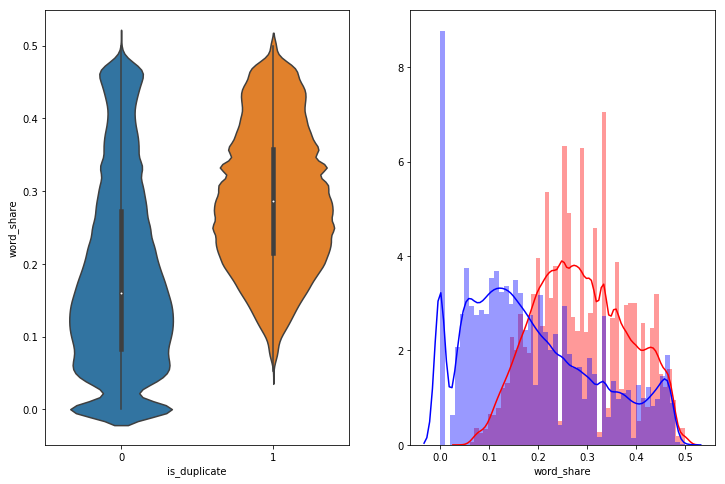

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.violinplot(x="is_duplicate",y="word_share",data=data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()


# Observations:
## Both classes are overlapping this indicates that this feature is not that significant.
## The above features are calculated on unprocessed data we will try to preprocess the data and re do the featurization and do the analysis.

# Preprocessing the text.

In [ ]:
if os.path.isfile("df_fe_without_preprocessing_train.csv"):
    data=pd.read_csv("df_fe_without_preprocessing_train.csv")
    data=data.fillna("")
    data.head()
else: 
    print("retrive the file by executing above cell") 
  

In [ ]:
data.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23.0,0.434783,2,0


In [ ]:
#download stop eords from nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mlportfolioprojects/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
### To get the results in 4 decemal points to avoid devision by zero 
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")#stop words in engilsh.

#compete function for data preprocessing. 
def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)#bunch of regular expression processsing.
    
    
    porter = PorterStemmer()#stemming to bring the words into there root word.
    pattern = re.compile('\W')#breaks a line into words.or read only words and not white spaces.
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)#this will remove the xml and html tags
        x = example1.get_text()
               
    
    return x

# Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

Definition:



1.   Token: You get a token by splitting sentence a space.
2.   Stop_Word : stop words as per NLTK.
3.   Word : A token that is not a stop_word



**Features:**
 

1.cwc_min: Ratio of common_word_count to min length of word_count of q1 to q2.
  cwc_min=common_word_counts/(min(len(q1_word),len(q2_word))

2.cwc_max: Ratio of common_word_count to max length of word_count of q1 to q2.
  cwc_max= common_word_counts/(max(len(q1_word),len(q2_word))

3.csc_min: Ratio of common_stop_count to min length to stoop count of Q1 and Q2.
csc_min=common_stop_count/(min(len(q1_stops),len(q2_stops))

4.csc_max: Ratio of common_stop_count to max length to stop count of Q1 and Q2.
csc_max=common_stop_count/(max(len(q1_stops),len(q2_stops))

5.ctc_min:Ratio of common_tokan_count to min length to tokan count of Q1 and Q2.
ctc_min=common_tokan_count/(min(len(q1_tokan),len(q2_tokan))

6.ctc_max:Ratio of common_tokan_count to max length to tokan count of Q1 and Q2.
ctc_max=common_tokan_count/(max(len(q1_tokan),len(q2_tokan))
 
 7.last_word_eq: Check if last word of both questions is equal or not.
 last_word_eq=int(q1_tokan[-1]==q2_tokan[-1])

 8.first_word_eq: Check if first word of both questions is equal or not.
 first_word_eq=int(q1_tokan[-1]==q2_tokan[-1])

9.abs_len_diff: Absolute length difference.
abs_len_diff=abs(len(q1_tokan),len(q2_tokan))

10.mean_len: Avgerage Tokan Lenght of both questions.
mean_len=(len(q1_token)+len(q2_tokan))/2


**11.Fuzz_ratio:** https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

**12.Fuzz_partion_ratio:**https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

**13.token_sort_ratio** : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

**14.token_set_ratio** : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

**15.Longest_substr_ratio:**Ratio of length longest common substring to min lenght of token count of Q1 and Q2.
**16.longest_substr_ratio=**len(longest common substring)/(min(len(q1 tokens)



In [ ]:
def get_token_features(q1, q2):#def a function
    token_features = [0.0]*10#create an array with 10 dimension
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()#split the sentence
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:#says that if len of q1 or q2 to zero 
        return token_features #it will return existing array.
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])#create a set of words which are not stopwords in q1
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])#create a set of words which are not stopwords in q2
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])#create a set of stop words in q1.
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])#create a set of stop words in q1.
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [ ]:
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


## Analysis of extracted features

### Plotting Word clouds

1.   Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
2.   We can observe the most frequent occuring words.



In [ ]:
df_duplicate=df[df["is_duplicate"]==1]#label=1 
dfp_nonduplicate=df[df["is_duplicate"]==0]#label=0
# converting 2d array of q1 and q2 and flatten the array:like{{1,2},{3,4,5}}=>{1,2,3,4,5}
p=np.dstack([df_duplicate["question1"],df_duplicate["question2"]]).flatten()#2D to 1D array for label 1
n=np.dstack([dfp_nonduplicate["question1"],dfp_nonduplicate["question2"]]).flatten()#2D to 1D array for label 0

print("number of data points in class 1 (duplicate pairs):",len(p))
print("number of data points in class 0(non duplicate pairs):",len(n))

#saving the np array into text file.
np.savetxt("train_p.txt",p,delimiter=" ",fmt="%s",encoding="utf-8")
np.savetxt("train_n.txt",n,delimiter=" ",fmt="%s",encoding="utf-8")


number of data points in class 1 (duplicate pairs): 298526
number of data points in class 0(non duplicate pairs): 510054


In [ ]:
#reading the text file and removing the stop words.
from os import path
d=path.dirname(".")#file with "."
textp_w=open(path.join(d,"train_p.txt")).read()#read file which is saved in d.
textn_w=open(path.join(d,"train_n.txt")).read()
stopwords=set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")


stopwords.remove("no")

print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16110763
Total number of words in non duplicate pair questions : 33201102


In [ ]:
from PIL import Image
alice_mask = Image.open(("alice_mask.png"))
alice_mask = np.asarray(alice_mask)

Word Cloud for Duplicate Question pairs


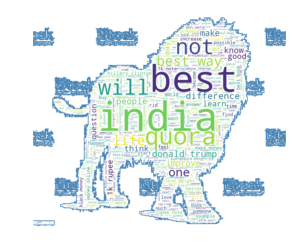

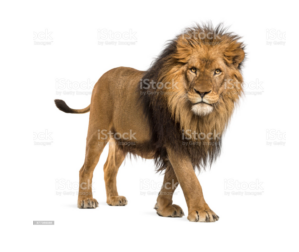

In [ ]:
from PIL import Image


#alice_mask = np.array(Image.open(path("alice_mask.png")))

wc = WordCloud(background_color="white", max_words=len(textp_w), mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')#initialise wordcloud
wc.generate(textp_w)#
print ("Word Cloud for Duplicate Question pairs")



plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


Word Cloud for non-Duplicate Question pairs:


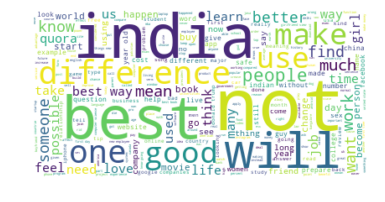

In [ ]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.columns


Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

### Pair Plot of  features ["ctc_min","cwc_min","csc_min","tokekn_sort_ratio"]

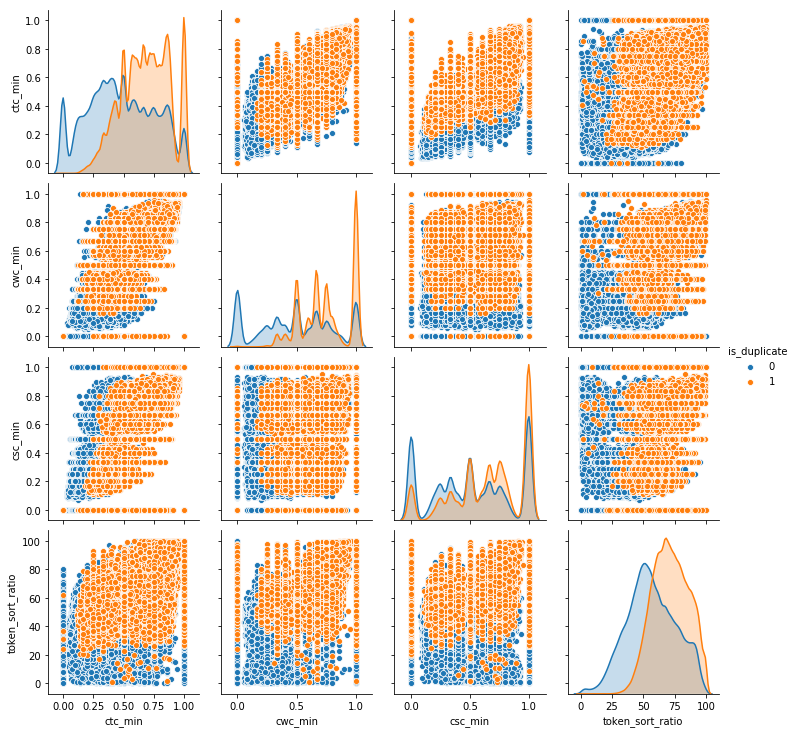

In [ ]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


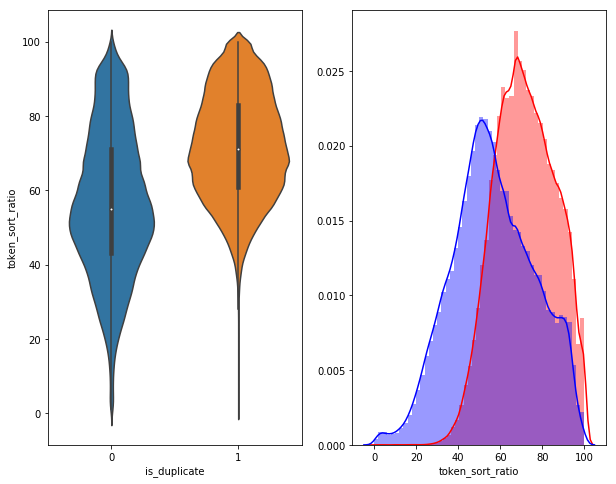

In [ ]:
#distribution of token_sort_ratio.
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.violinplot(x="is_duplicate",y="token_sort_ratio",data=df[0:])


plt.subplot(1,2,2)
sns.distplot(df[df["is_duplicate"]==1.0]["token_sort_ratio"][0:],label="1",color="red")
sns.distplot(df[df["is_duplicate"]==0.0]["token_sort_ratio"][0:],label="0",color="blue")
plt.show()


## Observation: The above plot says that token sort ratio is not that efficient in distinguish between weather the question is duplicate or not.

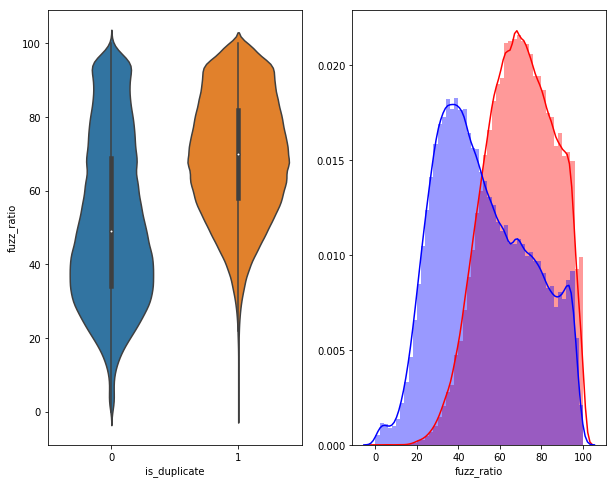

In [ ]:
#distribution of token_sort_ratio.
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.violinplot(x="is_duplicate",y="fuzz_ratio",data=df[0:])


plt.subplot(1,2,2)
sns.distplot(df[df["is_duplicate"]==1.0]["fuzz_ratio"][0:],label="1",color="red")
sns.distplot(df[df["is_duplicate"]==0.0]["fuzz_ratio"][0:],label="0",color="blue")
plt.show()


## Observation:Fuzz ration is also not that much efficient in seperating the labels.

In [ ]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [ ]:
#using TSNE for dimentionality reduction for 15 Features
from sklearn.preprocessing import MinMaxScaler
from os import path
from sklearn.manifold import TSNE
dfp_subsampled=df[0:5000]
X=MinMaxScaler().fit_transform((dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']]))
y=dfp_subsampled["is_duplicate"].values

In [ ]:
tsne2d=TSNE(n_components=2,init="random",
     random_state=101,
      method="barnes_hut",
     n_iter=1000,
     verbose=2,
     angle=0.5).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.008s...
[t-SNE] Computed neighbors for 5000 samples in 0.362s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.331s
[t-SNE] Iteration 50: error = 81.2897949, gradient norm = 0.0455700 (50 iterations in 5.130s)
[t-SNE] Iteration 100: error = 70.6164398, gradient norm = 0.0095177 (50 iterations in 3.986s)
[t-SNE] Iteration 150: error = 68.9172134, gradient norm = 0.0056736 (50 iterations in 3.843s)
[t-SNE] Iteration 200: error = 68.1004639, gradient norm = 0.0049672 (50 iterations in 3.963s)
[t-SNE] Iteration 250: error = 67.5914536, gradient norm = 0.0039700

/usr/local/lib/python3.5/dist-packages/seaborn/regression.py:576: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


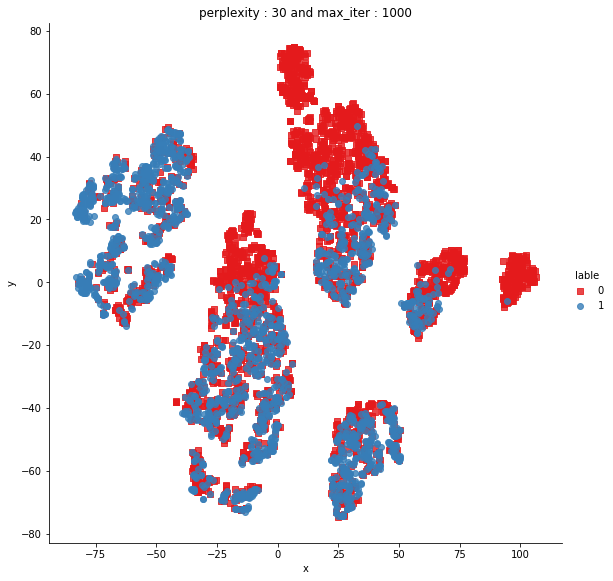

In [ ]:
df=pd.DataFrame({"x":tsne2d[:,0],"y":tsne2d[:,1],"lable":y})
#draw the plot in appropriate place
sns.lmplot(data=df, x="x", y="y", hue="lable", fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

## Observation: It is easly seen that there is lots of overlapping among the data point which clearly tells that the features which are considered will not produce the precise output we we are expected.Ideally the data points should be seperate from each other.

In [ ]:
#pip install spacy

## Featurizing text data with tfidf weighted W2V.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
from scipy.sparse import hstack
import numpy as np
from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm1

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy
from sklearn.model_selection import train_test_split

In [ ]:
#avoid decoding problems
df=pd.read_csv("train.csv")
# https://stackoverflow.com/a/6812069
#encoding questions to unicode
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [ ]:
df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0


In [ ]:
#prepro_features_train.csv(simple preprocessing Features)
#nlp_features_train.csv(NLP Features)
if os.path.isfile("nlp_features_train.csv"):
    dfnlp=pd.read_csv("nlp_features_train.csv",encoding="latin-1")
else:
    print("download nlp_features_train.csv from drive or previous notebook")

if os.path.isfile("df_fe_without_preprocessing_train.csv"):
    dfppro=pd.read_csv("df_fe_without_preprocessing_train.csv",encoding="latin-1")
else:
    print("download df_fe_without_preprocessing_train.csv form drive or run previous notebook")


In [ ]:
dfnlp.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.99998,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759


In [ ]:
df1=dfnlp.merge(dfppro,on='id',how="left")

In [ ]:
df1 = df1.drop(['qid1_x','qid2_x'],axis=1)
# df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [ ]:
df1.shape

(404290, 35)

In [ ]:
df1.head(1)

,id,question1_x,question2_x,is_duplicate_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1+q2,freq_q1-q2
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.99998,0.833319,0.999983,0.999983,0.916659,0.785709,...,1,66,57,14,12,10,23.0,0.434783,2,0


In [ ]:
#df1=df1.drop(["qid1_x","qid2_x"],axis=1)
#df3=df.drop(["qid1","qid2","question1","question2","is_duplicate"],axis=1)

In [ ]:
df1.shape

(404290, 35)

In [ ]:
df4=df1.merge(df3,on="id",how="left")


In [ ]:
df4.to_csv("df4.csv")

In [ ]:
df4=df4.sample(n=50000)

In [ ]:
df4.shape

(50000, 35)

In [ ]:
y_true=df4["is_duplicate_x"]
y_true

224545    0
60082     0
234618    1
64623     0
254970    1
         ..
49765     0
380672    0
297686    0
396806    0
125829    0
Name: is_duplicate_x, Length: 50000, dtype: int64

In [ ]:
df4=df4.drop(["is_duplicate_x"],axis=1)
df4.shape

(50000, 34)

In [ ]:
df4.head(1)

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1+q2,freq_q1-q2
224545,224545,is she lying about loving me why how,how do i know if my boyfriend is lying about l...,0.99995,0.499988,0.666656,0.499994,0.749991,0.499996,0.0,...,1,39,55,8,12,5,20.0,0.25,2,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df4,y_true,stratify=y_true,test_size=0.3)

In [ ]:
X_train.shape

(35000, 34)

In [ ]:
#X_train.to_csv("X_trian.csv")

In [ ]:
#X_test.shape

(15000, 34)

In [ ]:
#X_test.to_csv("X_test.csv")

In [ ]:
X_train.shape[0]+X_test.shape[0]

50000

In [ ]:
#filling the null values with " "
X_train=X_train.fillna(" ")
nan_rows1=X_train[X_train.isnull().any(1)]
print((nan_rows1))


#Filling the null values with " "
X_test=X_test.fillna(" ")
nan_rows2=X_test[X_test.isnull().any(1)]
print(nan_rows2)

Empty DataFrame
Columns: [id, question1_x, question2_x, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, qid1_y, qid2_y, question1_y, question2_y, is_duplicate_y, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_common, total_word, word_share, freq_q1+q2, freq_q1-q2]
Index: []

[0 rows x 34 columns]
Empty DataFrame
Columns: [id, question1_x, question2_x, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, qid1_y, qid2_y, question1_y, question2_y, is_duplicate_y, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_common, total_word, word_share, freq_q1+q2, freq_q1-q2]
Index: []

[0 rows x 34 columns]


# TFIDFW2V Vectorization on train data:

In [ ]:
X_train["question1_x"].isnull().values.any()

False

In [ ]:
X_train[X_train.isnull().values.any(1)]

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1+q2,freq_q1-q2


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
#merge tests.
questions_train =list(X_train["question1_x"])+list(X_train["question2_x"])

tfidf_train= TfidfVectorizer(lowercase=False)
tfidf_train.fit_transform(questions_train)

#dict key:word and value:tf-idf score
word2tfidf_train=dict(zip(tfidf_train.get_feature_names(),tfidf_train.idf_))

In [ ]:
word2tfidf_train

{'balloon': 10.210354657588429,
 'misspelling': 11.463117626083797,
 'cranes': 11.463117626083797,
 'motivational': 8.978210976295795,
 'overcoming': 10.54682689420964,
 't830mp2': 11.463117626083797,
 'excise': 11.463117626083797,
 'giveaways': 11.463117626083797,
 'army': 7.446734605331407,
 'thibaut': 11.463117626083797,
 'belly': 7.581553828140359,
 'bagels': 11.463117626083797,
 'softcore': 10.54682689420964,
 'erotic': 10.54682689420964,
 'eugenics': 11.463117626083797,
 'subset': 10.364505337415688,
 '32bit': 11.057652517975633,
 'atacama': 11.463117626083797,
 'humanity': 8.788968976657268,
 'relearn': 11.057652517975633,
 'lightining': 11.057652517975633,
 'strattera': 11.463117626083797,
 'sweeter': 11.463117626083797,
 'disconnecting': 10.54682689420964,
 'muhurtham': 11.463117626083797,
 'ranjan': 11.463117626083797,
 'charade': 11.463117626083797,
 'poop': 9.448214605541532,
 'maddow': 11.057652517975633,
 'bleach': 9.591315449182206,
 'bpm': 10.076823264963906,
 'controll

### After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.

### here we use a pre-trained GLOVE model which comes free with "Spacy". https://spacy.io/usage/vectors-similarity
### It is trained on Wikipedia and therefore, it is stronger in terms of word semantics.

In [ ]:
import spacy

In [ ]:
#!pip install -U spacy

In [ ]:
#!python3 -m spacy download en

In [ ]:
X_train.columns

Index(['id', 'question1_x', 'question2_x', 'cwc_min', 'cwc_max', 'csc_min',
       'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq',
       'abs_len_diff', 'mean_len', 'token_set_ratio', 'token_sort_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio', 'qid1_y',
       'qid2_y', 'question1_y', 'question2_y', 'is_duplicate_y', 'freq_qid1',
       'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_common', 'total_word', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

In [ ]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm1(list(X_train['question1_x'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf_train[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_train['q1_feats_m'] = list(vecs1)

In [ ]:
X_train.columns

Index(['id', 'question1_x', 'question2_x', 'cwc_min', 'cwc_max', 'csc_min',
       'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq',
       'abs_len_diff', 'mean_len', 'token_set_ratio', 'token_sort_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio', 'qid1_y',
       'qid2_y', 'question1_y', 'question2_y', 'is_duplicate_y', 'freq_qid1',
       'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_common', 'total_word', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'q1_feats_m', 'q2_feats_m'],
      dtype='object')

In [ ]:
vecs2 = []
for qu2 in tqdm1(list(X_train['question2_x'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf_train[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_train['q2_feats_m'] = list(vecs2)

In [ ]:
X_train_q1 = pd.DataFrame(X_train.q1_feats_m.values.tolist(), index= X_train.index)
X_train_q2 = pd.DataFrame(X_train.q2_feats_m.values.tolist(), index= X_train.index)

In [ ]:
X_train.drop(['q1_feats_m','q2_feats_m'],axis=1)

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1+q2,freq_q1-q2
81454,81454,how can i unlock my internet banking account o...,while activating net banking in my sbi account...,0.399996,0.249998,0.499995,0.499995,0.409089,0.333332,0.0,...,1,110,141,22,26,9,46.0,0.195652,2,0
403613,403613,can i reset a question on quora,how did my questions get reset on quora,0.666644,0.499988,0.249994,0.249994,0.428565,0.374995,1.0,...,1,34,40,7,8,2,15.0,0.133333,2,0
233462,233462,belief and beliefs can the existence of a god...,can a belief in buddhism co exist successfully...,0.166664,0.166664,0.399992,0.285710,0.230767,0.214284,0.0,...,1,70,78,13,13,3,23.0,0.130435,4,2
5067,5067,how do you know if someone is a psychopath,how do you know if you are a psychopath,0.999950,0.666644,0.833319,0.833319,0.777769,0.777769,1.0,...,4,43,40,9,9,7,17.0,0.411765,16,8
133435,133435,how many people die each year from sleep apnea,would anyone suffer from sleep apnea in zero g,0.333328,0.285710,0.499975,0.333322,0.333330,0.333330,0.0,...,1,47,47,9,8,2,17.0,0.117647,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298558,298558,did you see the second plane crash into the wt...,what russians thinks about the version of russ...,0.285710,0.124999,0.333328,0.199998,0.249998,0.137931,0.0,...,1,82,167,16,28,4,38.0,0.105263,2,0
13840,13840,how much control can one have over one own emo...,does our mind control our emotions,0.666644,0.499988,0.000000,0.000000,0.333328,0.199998,1.0,...,10,50,35,9,6,2,14.0,0.142857,19,1
230343,230343,why are so many quora questions about factual ...,why do so many people ask soppy questions on q...,0.499994,0.444440,0.285710,0.285710,0.399997,0.374998,0.0,...,38,99,80,16,15,5,31.0,0.161290,48,28
361787,361787,is there a pattern in morse code,is there a pattern to the designation of dots ...,0.999967,0.374995,0.999975,0.499994,0.999986,0.388887,1.0,...,1,33,100,7,18,7,23.0,0.304348,2,0


In [ ]:
if (1):
    X_train_q1['id']=X_train['id']
    X_train_q2['id']=X_train['id']
    df1  = X_train_q1.merge(X_train_q2, on='id',how='left')
    X_train  = X_train.merge(df1, on='id',how='left')

In [ ]:
"""
#from scipy.sparse import hstack
X_train=hstack((X_train,X_train_q1,X_train_q2)).tocsr()
print(X_tr.shape,y_train.shape)
print("="*100)
"""

'\n#from scipy.sparse import hstack\nX_train=hstack((X_train,X_train_q1,X_train_q2)).tocsr()\nprint(X_tr.shape,y_train.shape)\nprint("="*100)\n'

## TFIDFW2V Vectorization on test data:

In [ ]:
X_test['question1_x'].isnull().values.any()

False

In [ ]:
X_test[X_test.isnull().any(1)]

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1+q2,freq_q1-q2


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions_test = list(X_test['question1_x']) + list(X_test['question2_x'])

# tfidf_train = TfidfVectorizer(lowercase=False, )
tfidf_train.transform(questions_test)

# # dict key:word and value:tf-idf score
word2tfidf_test = dict(zip(tfidf_train.get_feature_names(), tfidf_train.idf_))

In [ ]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm1(list(X_test['question1_x'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf_test[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
X_test['q1_feats_m'] = list(vecs1)

In [ ]:
vecs2 = []
for qu2 in tqdm1(list(X_test['question2_x'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf_test[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
X_test['q2_feats_m'] = list(vecs2)

In [ ]:
X_test_q1 = pd.DataFrame(X_test.q1_feats_m.values.tolist(), index= X_test.index)
X_test_q2 = pd.DataFrame(X_test.q2_feats_m.values.tolist(), index= X_test.index)

In [ ]:
X_test.drop(['q1_feats_m','q2_feats_m'],axis=1)

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1+q2,freq_q1-q2
336752,336752,why did sundar pichai become the ceo of google,what do you think about sundar pichai becoming...,0.799984,0.571420,0.249994,0.199996,0.555549,0.416663,0.0,...,2,47,65,9,12,4,21.0,0.190476,3,1
353602,353602,does google play support flac files,does google play music support flac if not w...,0.799984,0.571420,0.999900,0.199996,0.833319,0.357140,0.0,...,1,37,79,6,14,4,19.0,0.210526,2,0
131347,131347,why is the life of an ias officer painful,is life being an ias officer overhyped in india,0.749981,0.599988,0.499988,0.399992,0.555549,0.555549,0.0,...,1,42,48,9,9,5,18.0,0.277778,2,0
386488,386488,do i need to get a tetanus shot again,why do i need to get a tetanus shot,0.999975,0.999975,0.799984,0.799984,0.888879,0.888879,0.0,...,1,38,36,9,9,7,18.0,0.388889,3,1
178705,178705,what is the difference between windows 8 and w...,what is the difference between windows 7 wind...,0.999975,0.666656,0.999980,0.999980,0.899991,0.692302,1.0,...,1,56,69,10,12,8,19.0,0.421053,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314809,314809,how can i increase the traffic on a site,how do i get traffic for website,0.333322,0.333322,0.499988,0.333328,0.428565,0.333330,0.0,...,19,41,33,9,7,3,16.0,0.187500,27,11
87705,87705,how do i prepare for ge pi and wat in sims pune,i got selected for pi wat for symbiosis pune ...,0.666656,0.307690,0.833319,0.416663,0.749994,0.281249,0.0,...,1,48,148,12,30,6,36.0,0.166667,2,0
392084,392084,what are the pros and cons of homeschooling,if you are homeschooling or have been homesch...,0.999967,0.599988,0.599988,0.299997,0.749991,0.374998,0.0,...,1,44,86,8,16,5,23.0,0.217391,4,2
90353,90353,is it true that the businessman donald trump i...,is donald trump actually broke is he just run...,0.599988,0.499992,0.499988,0.399992,0.499995,0.416663,0.0,...,3,54,65,10,12,5,20.0,0.250000,5,1


In [ ]:
if (1):
    X_test_q1['id']=X_test['id']
    X_test_q2['id']=X_test['id']
    df2  = X_test_q1.merge(X_test_q2, on='id',how='left')
    X_test  = X_test.merge(df2, on='id',how='left')

In [ ]:
X_train.shape

(35000, 228)

In [ ]:
X_test.shape

(15000, 228)

### Storing final features and their targets with respective splitting

In [ ]:
X_train.to_pickle("X_train.txt")
y_train.to_pickle("y_train.txt")
X_test.to_pickle("X_test.txt")
y_test.to_pickle("y_test.txt")

NameError: name 'X_train' is not defined

In [ ]:
X_train=pd.read_pickle("X_train.txt")
y_train=pd.read_pickle("y_train.txt")
X_test=pd.read_pickle("X_test.txt")
y_test=pd.read_pickle("y_test.txt")

In [ ]:
X_train = X_train.drop(["id","question1_x","question2_x","q1_feats_m","q2_feats_m","qid1_y","qid2_y","question1_y","question2_y","is_duplicate_y"],axis=1)
X_test = X_test.drop(["id","question1_x","question2_x","q1_feats_m","q2_feats_m","qid1_y","qid2_y","question1_y","question2_y","is_duplicate_y"],axis=1)

In [ ]:
X_train


,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0.399996,0.249998,0.499995,0.499995,0.409089,0.333332,0.0,0.0,5.0,24.5,...,94.258277,93.588393,97.177637,63.017595,-61.619104,-112.240074,-170.316905,-61.963933,45.206772,43.316115
1,0.666644,0.499988,0.249994,0.249994,0.428565,0.374995,1.0,0.0,1.0,7.5,...,-1.222445,36.852844,7.223440,8.852079,25.432050,26.664905,-10.530010,-49.627033,-0.072315,25.115056
2,0.166664,0.166664,0.399992,0.285710,0.230767,0.214284,0.0,0.0,1.0,13.5,...,47.063131,2.641556,-29.357331,38.855888,-1.824472,-59.946420,-45.168740,-29.290025,35.714327,-55.674301
3,0.999950,0.666644,0.833319,0.833319,0.777769,0.777769,1.0,1.0,0.0,9.0,...,54.443751,4.851364,-13.623956,-4.028507,26.018336,-44.183614,-29.388297,-35.128021,10.005904,-20.047160
4,0.333328,0.285710,0.499975,0.333322,0.333330,0.333330,0.0,0.0,0.0,9.0,...,-27.075918,39.696902,51.316498,33.338936,59.319069,-62.911218,32.454174,7.465350,66.759380,-40.209720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,0.285710,0.124999,0.333328,0.199998,0.249998,0.137931,0.0,0.0,13.0,22.5,...,-35.788190,23.324746,105.088806,201.509152,-152.178372,118.354504,59.952542,20.466287,198.738661,-109.431286
34996,0.666644,0.499988,0.000000,0.000000,0.333328,0.199998,1.0,0.0,4.0,8.0,...,-14.672097,20.386237,1.032475,-14.543077,-21.844085,25.450139,26.609657,-35.097614,-9.805624,-33.444978
34997,0.499994,0.444440,0.285710,0.285710,0.399997,0.374998,0.0,1.0,1.0,15.5,...,46.024738,29.966416,18.936132,41.541395,6.075330,-4.802433,71.884659,-17.390767,-81.035348,-36.520048
34998,0.999967,0.374995,0.999975,0.499994,0.999986,0.388887,1.0,1.0,11.0,12.5,...,87.646790,-4.208319,63.698727,47.062525,76.101806,-55.955725,-39.592932,-17.003490,134.001836,66.258394


In [ ]:
X_test

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0.799984,0.571420,0.249994,0.199996,0.555549,0.416663,0.0,0.0,3.0,10.5,...,-37.903228,21.564575,40.207857,-18.270421,14.573629,-15.422699,28.817683,-9.351538,55.167781,-78.264800
1,0.799984,0.571420,0.999900,0.199996,0.833319,0.357140,0.0,1.0,8.0,10.0,...,38.209462,7.816160,6.546256,-24.129316,8.202099,-62.896585,4.604296,3.664546,-36.593786,50.240417
2,0.749981,0.599988,0.499988,0.399992,0.555549,0.555549,0.0,0.0,0.0,9.0,...,-27.846438,48.281006,62.074049,8.905866,-23.938052,-8.503127,48.345005,8.174074,85.171602,-54.367727
3,0.999975,0.999975,0.799984,0.799984,0.888879,0.888879,0.0,0.0,0.0,9.0,...,-7.374949,7.554926,9.527580,5.646344,-42.767079,9.010017,-22.648890,32.978014,6.444402,29.553841
4,0.999975,0.666656,0.999980,0.999980,0.899991,0.692302,1.0,1.0,3.0,11.5,...,57.554790,18.358071,23.291692,54.344667,-15.771615,-76.629470,5.681149,24.998411,44.412341,-44.223167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.333322,0.333322,0.499988,0.333328,0.428565,0.333330,0.0,1.0,2.0,8.0,...,-13.303869,20.072407,-10.156167,-45.750440,-18.299146,-15.526027,-28.398201,-12.963569,15.412056,-5.936121
14996,0.666656,0.307690,0.833319,0.416663,0.749994,0.281249,0.0,0.0,20.0,22.0,...,-11.300929,67.029498,14.077233,-9.426325,-137.541274,-44.481956,30.813306,-35.711921,-35.867134,-91.654665
14997,0.999967,0.599988,0.599988,0.299997,0.749991,0.374998,0.0,0.0,8.0,12.0,...,71.544373,69.508935,-7.370720,25.353244,71.814743,-28.280535,-13.310076,-29.775822,19.959491,-12.696432
14998,0.599988,0.499992,0.499988,0.399992,0.499995,0.416663,0.0,1.0,2.0,11.0,...,5.644024,24.153513,-10.653390,16.296028,19.719527,-15.129187,12.747904,-2.474055,67.337181,-137.880103


In [ ]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(X_train.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_common
total_word
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y

In [ ]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(X_test.columns)
for i in cols:
#     data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_common
total_word
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y

# Modelling:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [ ]:
df4=pd.read_csv("df4.csv",index_col=0)

In [ ]:
df4.shape

(404290, 35)

In [ ]:
df4=df4.sample(n=50000)

In [ ]:
df4.shape

(50000, 35)

In [ ]:
y_true=df4["is_duplicate_x"]

In [ ]:
df4 = df4.drop(['is_duplicate_x'],axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df4,y_true,stratify=y_true,test_size=0.3)

In [ ]:
print("number of data points in train data:",X_train.shape)
#print("number of data points in tst data:",X_test.shape)


number of data points in train data: (35000, 34)


In [ ]:
X_train.isnull().values.any()

True

In [ ]:
#filling the null values with " "
X_train=X_train.fillna(" ")
nan_rows1=X_train[X_train.isnull().any(1)]
print((nan_rows1))


#Filling the null values with " "
X_test=X_test.fillna(" ")
nan_rows2=X_test[X_test.isnull().any(1)]
print(nan_rows2)

Empty DataFrame
Columns: [id, question1_x, question2_x, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, qid1_y, qid2_y, question1_y, question2_y, is_duplicate_y, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_common, total_word, word_share, freq_q1+q2, freq_q1-q2]
Index: []

[0 rows x 34 columns]
Empty DataFrame
Columns: [id, question1_x, question2_x, cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max, last_word_eq, first_word_eq, abs_len_diff, mean_len, token_set_ratio, token_sort_ratio, fuzz_ratio, fuzz_partial_ratio, longest_substr_ratio, qid1_y, qid2_y, question1_y, question2_y, is_duplicate_y, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words, word_common, total_word, word_share, freq_q1+q2, freq_q1-q2]
Index: []

[0 rows x 34 columns]


In [ ]:
X_train.isnull().values.any()

False

In [ ]:
X_test.isnull().values.any()

False

# preparing data matrix:

In [ ]:
# preparing data matrix for train:
from sklearn.feature_extraction.text import TfidfVectorizer
questions_train = list(X_train['question1_x']) + list(X_train['question2_x'])
vectorizer_tfidf_ques = TfidfVectorizer(lowercase=False,min_df=10,encoding='utf-8')
vectorizer_tfidf_ques.fit(questions_train)

q1_tfidf_train = vectorizer_tfidf_ques.transform(X_train['question1_x'])
q2_tfidf_train = vectorizer_tfidf_ques.transform(X_train['question2_x'])
print("Shape of matrix after q1_tfidf_train ",q1_tfidf_train.shape)
print("Shape of matrix after q2_tfidf_train ",q2_tfidf_train.shape)

Shape of matrix after q1_tfidf_train  (35000, 5230)
Shape of matrix after q2_tfidf_train  (35000, 5230)


In [ ]:
X_train = X_train.drop(['id','question1_x','question2_x','qid1_y','qid2_y','question1_y','question2_y','is_duplicate_y'],axis=1)

In [ ]:
X_train = hstack((X_train,q1_tfidf_train,q2_tfidf_train))

In [ ]:
X_train

<35000x10486 sparse matrix of type '<class 'numpy.float64'>'
	with 1477761 stored elements in COOrdinate format>

In [ ]:
# preparing data matrix for test:
#from sklearn.feature_extraction import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
q1_tfidf_test = vectorizer_tfidf_ques.transform(X_test['question1_x'])
q2_tfidf_test = vectorizer_tfidf_ques.transform(X_test['question2_x'])
print("Shape of matrix after q1_tfidf_test ",q1_tfidf_test.shape)
print("Shape of matrix after q2_tfidf_test ",q2_tfidf_test.shape)

Shape of matrix after q1_tfidf_test  (15000, 5230)
Shape of matrix after q2_tfidf_test  (15000, 5230)


In [ ]:
X_test = X_test.drop(['id','question1_x','question2_x','qid1_y','qid2_y','question1_y','question2_y','is_duplicate_y'],axis=1)

In [ ]:
X_test = hstack((X_test,q1_tfidf_test,q2_tfidf_test))

In [ ]:
X_train

<35000x10486 sparse matrix of type '<class 'numpy.float64'>'
	with 1477761 stored elements in COOrdinate format>

In [ ]:
X_test

<15000x10486 sparse matrix of type '<class 'numpy.float64'>'
	with 631082 stored elements in COOrdinate format>

In [ ]:
print("-"*10,"Distribution of output variable in train data","-"*10)
train_distr=Counter(y_train)
train_len=len(y_train)
print("Class 0 :",int(train_distr[0])/train_len,"Class 1 :",int(train_distr[1])/train_len)

test_distr=Counter(y_test)
test_len=len(y_test)
print("Class 0 :",int(test_distr[0])/test_len,"Class 1 :",int(test_distr[1])/test_len)


---------- Distribution of output variable in train data ----------
Class 0 : 0.6281714285714286 Class 1 : 0.37182857142857145
Class 0 : 0.6282 Class 1 : 0.3718


In [ ]:
#function for confussion matrix.
def plot_confusion_matrix(test_y,predict_y):
    C=confusion_matrix(test_y,predict_y)
    A=(((C.T)/(C.sum(axis=1))).T)
    B=(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels=[1,2]
    #representing A in heat map
    cmap=sns.light_palette("blue")
    plt.subplot(1,3,1)
    sns.heatmap(C,annot=True,cmap=cmap,fmt=".3f",xticklabels=labels,yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Original class")
    plt.title("Comfusion_Matrix")
    
    plt.subplot(1,3,2)
    sns.heatmap(B,annot=True,cmap=cmap,fmt=".3f",xticklabels=labels,yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Original class")
    plt.title("Comfusion_Matrix")
    
    plt.subplot(1,3,3)
    sns.heatmap(A,annot=True,cmap=cmap,fmt=".3f",xticklabels=labels,yticklabels=labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("Original class")
    plt.title("Comfusion_Matrix")
    
    
    plt.show()
    
    
    

In [ ]:
<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

log loss on Test Data using Random Model 0.8872059515005446


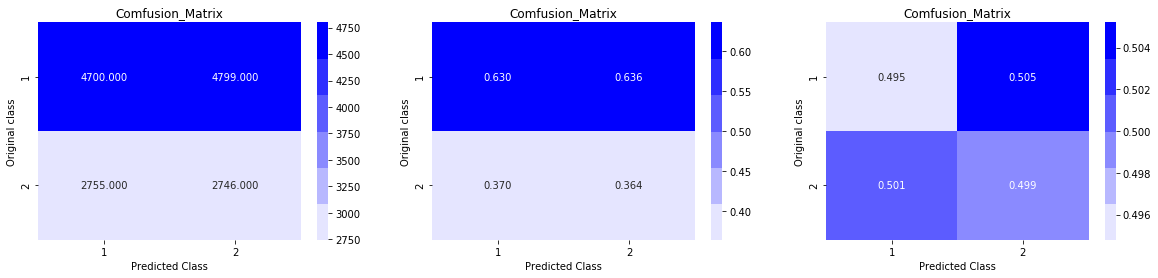

In [ ]:
#we need to generate 9 numbers and the sum of numbers should be 1
#one solution is to generate the 9 numbers and devide each number by there sum.
#ref: https://stackoverflow.com/a/18662466/4084039
#we create a output array that has exactly same size as the CV data.
predicted_y=np.zeros((test_len,2))
for i in range(test_len):
    rand_probs=np.random.rand(1,2)
    predicted_y[i]=((rand_probs/sum(sum(rand_probs)))[0])
print("log loss on Test Data using Random Model",log_loss(y_test,predicted_y,
                                                             eps=1e-15))
predicted_y=np.argmax(predicted_y,axis=1)
plot_confusion_matrix(y_test,predicted_y)
    

In [ ]:
# Logistic Regression with hyperparameter tunning.


In [ ]:
X_train.shape

(35000, 10438)

In [ ]:
y_train.shape

(35000,)

# Logistic Rregression

for value of alpha= 1e-05 The log loss is : 0.42765695146671284
for value of alpha= 0.0001 The log loss is : 0.41986498007054046
for value of alpha= 0.001 The log loss is : 0.4183917293654315
for value of alpha= 0.01 The log loss is : 0.44025539870528496
for value of alpha= 0.1 The log loss is : 0.4574557993950481
for value of alpha= 1 The log loss is : 0.4952633595633255
for value of alpha= 10 The log loss is : 0.5433894838098892


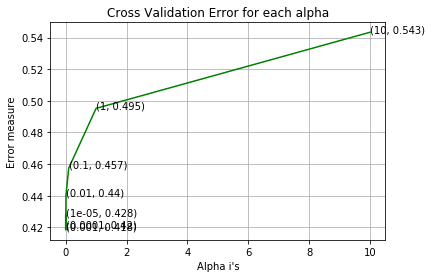

for values of best alpha= 0.001 The train log loss is: 0.41416973449086913
for values of best alpha= 0.001 The train log loss is: 0.4183917293654315
total number of data points: 15000


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [ ]:
alpha=[10**x for x in range(-5,2)]#hyper parameter for SGD classifier.

log_error_array=[]
for i in alpha:
    clf=SGDClassifier(alpha=i,penalty="l2",loss="log",random_state=1234,n_jobs=-1)
    clf.fit(X_train,y_train)
    sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
    sig_clf.fit(X_train,y_train)
    predict_y=sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))
    print("for value of alpha=",i,"The log loss is :",log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))
    
    
fig,ax=plt.subplots()
ax.plot(alpha,log_error_array,c="g")
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



best_alpha=np.argmin(log_error_array)
clf=SGDClassifier(alpha=alpha[best_alpha],penalty="l2",loss="log",n_jobs=-1,random_state=1234)
clf.fit(X_train,y_train)
sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
sig_clf.fit(X_train,y_train)

predict_y=sig_clf.predict_proba(X_train)
print("for values of best alpha=",alpha[best_alpha],"The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y=sig_clf.predict_proba(X_test)
print("for values of best alpha=",alpha[best_alpha],"The train log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y=np.argmax(predict_y,axis=1)
print("total number of data points:",len(predicted_y))
plot_confusion_matrix(y_test,predict_y)

# SVM Classifier:

In [ ]:
alpha=[10**x for x in range(-5,2)]#hyper parameter for SGD classifier.

log_error_array=[]
for i in alpha:
    clf=SGDClassifier(alpha=i,penalty="l2",loss="log",random_state=1234,n_jobs=-1)
    clf.fit(X_train,y_train)
    sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
    sig_clf.fit(X_train,y_train)
    predict_y=sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))
    print("for value of alpha=",i,"The log loss is :",log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))
    
    
fig,ax=plt.subplots()
ax.plot(alpha,log_error_array,c="g")
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



best_alpha=np.argmin(log_error_array)
clf=SGDClassifier(alpha=alpha[best_alpha],penalty="l2",loss="hinge",n_jobs=-1,random_state=1234)
clf.fit(X_train,y_train)
sig_clf=CalibratedClassifierCV(clf,method="sigmoid")
sig_clf.fit(X_train,y_train)

predict_y=sig_clf.predict_proba(X_train)
print("for values of best alpha=",alpha[best_alpha],"The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y=sig_clf.predict_proba(X_test)
print("for values of best alpha=",alpha[best_alpha],"The train log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y=np.argmax(predict_y,axis=1)
print("total number of data points:",len(predicted_y))
plot_confusion_matrix(y_test,predict_y)

# XGBoost Classifier:

In [ ]:
# XGBOOST
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 127.6 MB 19 kB/s s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y,labels=clf.classes_, eps=1e-15))
log_loss

[0]	train-logloss:0.68471	valid-logloss:0.68477
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.61493	valid-logloss:0.61518
[20]	train-logloss:0.56460	valid-logloss:0.56524
[30]	train-logloss:0.52706	valid-logloss:0.52791
[40]	train-logloss:0.49768	valid-logloss:0.49887
[50]	train-logloss:0.47460	valid-logloss:0.47610
[60]	train-logloss:0.45605	valid-logloss:0.45792
[70]	train-logloss:0.44112	valid-logloss:0.44344
[80]	train-logloss:0.42909	valid-logloss:0.43166
[90]	train-logloss:0.41929	valid-logloss:0.42228
[100]	train-logloss:0.41123	valid-logloss:0.41459
[110]	train-logloss:0.40453	valid-logloss:0.40821
[120]	train-logloss:0.39888	valid-logloss:0.40295
[130]	train-logloss:0.39400	valid-logloss:0.39831
[140]	train-logloss:0.38984	valid-logloss:0.39454
[150]	train-logloss:0.38622	valid-logloss:0.39136
[160]	train-logloss:0.38300	valid-logloss:0.38857
[170]	trai

<function sklearn.metrics._classification.log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)>

# XGboost hyperperameter tunning using hyperopt library.

In [ ]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
X_train

,id,question1_x,question2_x,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,total_word,word_share,freq_q1+q2,freq_q1-q2
7786,7786,when should i apply to harvard mba,when should i apply to harvard,0.999950,0.666644,0.999975,0.999975,0.999983,0.857131,0.0,...,1,35,31,7,6,5,13.0,0.384615,2,0
398115,398115,how do i become a good problem solver,how does someone become a better problem solver,0.749981,0.599988,0.666644,0.499988,0.624992,0.624992,1.0,...,5,38,48,8,8,5,16.0,0.312500,13,3
53876,53876,what is diabetes,what is cause for diabetes,0.999900,0.499975,0.999950,0.666644,0.999967,0.599988,1.0,...,2,17,27,3,5,3,8.0,0.375000,3,1
66111,66111,why do not people worry about global warming,why do people worry about global warming,0.999975,0.999975,0.999967,0.749981,0.999986,0.874989,1.0,...,1,44,41,7,7,6,14.0,0.428571,3,1
252705,252705,i want to start my pool site restaurant in uda...,i want to open a good quality mid sized restau...,0.272725,0.176470,0.624992,0.416663,0.421050,0.200000,0.0,...,1,205,107,40,18,7,47.0,0.148936,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135471,135471,recently dopt has decided to set up an expert ...,why does the sum of integers up to any power o...,0.000000,0.000000,0.499995,0.357140,0.277776,0.113636,0.0,...,1,261,91,44,18,5,52.0,0.096154,2,0
293594,293594,how do you know if someone declines your conne...,what is linkedin own average number of connect...,0.199996,0.166664,0.000000,0.000000,0.099999,0.090908,0.0,...,2,64,58,11,9,0,20.0,0.000000,4,0
357406,357406,who is or was the best prime minister of india...,who is the best prime minister india has ever ...,0.999975,0.666656,0.749981,0.374995,0.699993,0.583328,0.0,...,3,55,50,12,10,7,22.0,0.318182,8,2
212314,212314,what are some major landforms in texas and ho...,what are some major landforms in texas and ho...,0.833319,0.833319,0.999991,0.999991,0.842101,0.842101,0.0,...,1,105,104,19,19,16,34.0,0.470588,6,4


In [ ]:
y_train

7786      0
398115    1
53876     0
66111     0
252705    0
         ..
135471    0
293594    0
357406    1
212314    0
336634    0
Name: is_duplicate_x, Length: 35000, dtype: int64

In [ ]:
#search Space:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.quniform ('gamma', 1,9,1),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,10),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators',100,200,20),
        'seed': 0
    }

In [ ]:
#All parameters of xgb classfier:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [ ]:

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']), 
                    gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),
                    min_child_weight=int(space['min_child_weight']),
                    reg_lambda=int(space["reg_lambda"]),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="logloss",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()
#fmin is minimization function which will minimise the objective function over the space using tpe.suggest algo with 100 max_evals.
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials, 
                        show_progressbar=True,
                        verbose=True)

SCORE:                                                 
0.6282                                                 
SCORE:                                                                
0.6282                                                                
SCORE:                                                                
0.6282                                                                
SCORE:                                                                
0.6282                                                                
SCORE:                                                                
0.6282                                                                
SCORE:                                                                
0.6282                                                                
SCORE:                                                                
0.6282                                                                
SCORE:                              

In [ ]:
#gives the best_hyperparameters.
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'n_estimators': 100.0, 'max_depth': 9.0, 'reg_lambda': 0.7944488989254225, 'reg_alpha': 150.0, 'min_child_weight': 6.0, 'colsample_bytree': 0.6668681428303032, 'gamma': 3.0}


In [ ]:
y_test

2601      0
391368    0
395150    0
103299    1
377531    0
         ..
17810     0
107191    0
205144    1
203055    0
221139    1
Name: is_duplicate_x, Length: 15000, dtype: int64

In [ ]:
#rerun the xgboost classifier using tuned hyperparameters.
import xgboost as xgb
params = {'n_estimators': 100, 'max_depth': 9,
          'reg_lambda': 0.7944488989254225,
          'reg_alpha': 150.0, 'min_child_weight': 6.0, 
          'colsample_bytree': 0.6668681428303032, 'gamma': 3.0,
          'eval_metric':'logloss',
         'objective':'binary:logistic'}

#xgb takes input in datamatrix format.

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train,400, watchlist, early_stopping_rounds=20, verbose_eval=5)

xgdmat = xgb.DMatrix(X_train,y_train)
predicted_y = bst.predict(d_test)
print("The test log loss is:", log_loss(y_test, predicted_y, eps=1e-15))
log_loss

[04:25:41] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.59490	valid-logloss:0.59661
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[5]	train-logloss:0.42602	valid-logloss:0.43077
[10]	train-logloss:0.38850	valid-logloss:0.39667
[15]	train-logloss:0.37270	valid-logloss:0.38275
[20]	train-logloss:0.36534	valid-logloss:0.37677
[25]	train-logloss:0.36128	valid-logloss:0.37353
[30]	train-logloss:0.35840	valid-logloss:0.37134
[35]	train-logloss:0.35801	valid-logloss:0.37123
[40]	train-logloss:0.35801	valid-logloss:0.37123
[45]	train-logloss:0.35801	valid-logloss:0.37123
[50]	train-logloss:0.

<function sklearn.metrics._classification.log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)>

# XGBoost with Randamizedsearchedcv method:

In [ ]:
params={'max_depth': [3, 18, 1],
'gamma':[1,2,3,4,5,6,7,8,9],
'reg_alpha': [40,180],
'reg_lambda': [0,1],
'colsample_bytree':[0.5,1],
'min_child_weight':[0, 10, 1],
'n_estimators': [100,110,120,150,180],
'eta' : [0.01, 0.02, 0.05, 0.1]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
xgb = xgb.XGBClassifier()
random_search = RandomizedSearchCV(xgb, param_distributions=params, scoring='neg_log_loss', n_jobs=-1, verbose=10, random_state=42 ,return_train_score=True) 
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  3.3min remaining:   43.7s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  3.7min remaining:   14.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.9min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=Non...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 1],
                                        'eta': [0.01, 0.02, 0.05, 0.1],
                       

In [ ]:
print('Best hyperparameters:')
print(random_search.best_params_)

Best hyperparameters:
{'n_estimators': 110, 'max_depth': 18, 'reg_lambda': 0, 'reg_alpha': 40, 'min_child_weight': 10, 'colsample_bytree': 1, 'gamma': 4, 'eta': 0.1}


In [ ]:
import xgboost as xgb
params = {'n_estimators': 110, 
 'max_depth': 18, 
 'reg_lambda': 0, 
 'reg_alpha': 40, 
 'min_child_weight': 10,
 'colsample_bytree': 1, 
 'gamma': 4, 'eta': 0.1,
'eval_metric':'logloss',
'objective':'binary:logistic'}



d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

[05:06:17] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64967	valid-logloss:0.65044
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.44739	valid-logloss:0.45452
[20]	train-logloss:0.38474	valid-logloss:0.39752
[30]	train-logloss:0.35863	valid-logloss:0.37513
[40]	train-logloss:0.34538	valid-logloss:0.36441
[50]	train-logloss:0.33677	valid-logloss:0.35818
[60]	train-logloss:0.33045	valid-logloss:0.35444
[70]	train-logloss:0.32730	valid-logloss:0.35253
[80]	train-logloss:0.32446	valid-logloss:0.35090
[90]	train-logloss:0.32157	valid-logloss:0.34973
[100]	train-logloss:

In [ ]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.7 MB 2.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
#df4=pd.read_csv("df4.csv",index_col=0)

In [ ]:
#y_train=df4["is_duplicate_x"]
#columns=["is_duplicate_x"]
#y_train=pd.DataFrame(y_train,columns=columns)

In [ ]:
#y_train.shape

(404290, 1)

In [ ]:
#df4=df4.drop(["is_duplicate_x"],axis=1)

In [ ]:
#df4.shape

(404290, 34)

In [ ]:
#X_tr,y_tr,X_te,y_te=train_test_split(df4, y_train,test_size=0.3, random_state=42)


In [ ]:
#print(X_tr.shape,y_tr.shape,X_te.shape,y_te.shape)

(283003, 34) (121287, 34) (283003, 1) (121287, 1)


In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
random_search = RandomizedSearchCV(lgb, param_distributions=params, scoring='neg_log_loss', 
                                   n_jobs=-1, verbose=10, random_state=42 ,return_train_score=True) 
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   15.6s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   16.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.5s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                                                             10000.0],
                                        'num_leaves': 

In [ ]:
print('Best hyperparameters:')
print(random_search.best_params_)

Best hyperparameters:
{'subsample': 0.3457888702304499, 'colsample_bytree': 0.6640914962437607, 'min_child_samples': 363, 'reg_lambda': 5, 'reg_alpha': 0, 'min_child_weight': 0.01, 'num_leaves': 19}


In [ ]:
import lightgbm as lgb

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {'subsample': 0.3457888702304499, 
          'colsample_bytree': 0.6640914962437607, 
          'min_child_samples': 363, 'reg_lambda': 5, 
          'reg_alpha': 0, 'min_child_weight': 0.01, 
          'num_leaves': 19,'eval_metric':'logloss',
          'objective':'binary'}



d_train = X_train
d_test = X_test 


lgbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                valid_sets=lgb_eval,
                early_stopping_rounds=50)


predict_y = lgbm.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 12915, number of negative: 22085
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46858
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 229
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369000 -> initscore=-0.536509
[LightGBM] [Info] Start training from score -0.536509
[1]	valid_0's binary_logloss: 0.620581
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.590811
[3]	valid_0's binary_logloss: 0.565097
[4]	valid_0's binary_logloss: 0.543517
[5]	valid_0's binary_logloss: 0.52374
[6]	valid_0's binary_logloss: 0.506902
[7]	valid_0's binary_logloss: 0.491989
[8]	valid_0'

# sentence Embedding using BERT.

In [ ]:
# install huggingface library.
!pip install transformers

In [ ]:
!pip install -U sentence-transformers

In [ ]:
# We will use distill-BERT.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("train.csv",nrows=100)

In [ ]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
data.isnull().any()

id              False
qid1            False
qid2            False
question1       False
question2       False
is_duplicate    False
dtype: bool

In [ ]:
# Filling the null values with ' '
data = data.fillna('')#replace the null values with no space.
#nan_rows = data[data.isnull().any(1)]
#nan_rows

In [ ]:
data.isnull().any()

id              False
qid1            False
qid2            False
question1       False
question2       False
is_duplicate    False
dtype: bool

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

100%|██████████| 245M/245M [00:15<00:00, 15.6MB/s]


In [ ]:
data['question1'] = data['question1'].apply(lambda x: str(x))
data['question2'] = data['question2'].apply(lambda x: str(x))

In [ ]:
corpus1 = list(data["question1"]) 

In [ ]:
corpus2 = list(data["question2"])

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch
import tqdm
#from tqdmnotebook import notebook1
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Corpus with example sentences
corpus1 = corpus1
corpus_embeddings_1 = (embedder.encode(corpus1, convert_to_tensor=True))

100%|██████████| 245M/245M [00:15<00:00, 15.5MB/s]


In [ ]:
sentence_corpus=corpus1+corpus2

In [ ]:
len(sentence_corpus)

200

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch
import tqdm
#from tqdmnotebook import notebook1
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Corpus with example sentences
corpus2 = corpus2
corpus_embeddings_2= (embedder.encode(corpus2, convert_to_tensor=True))

In [ ]:
corpus=corpus_embeddings_1+corpus_embeddings_2

In [ ]:
len(corpus)

100

In [ ]:
 #Query sentences:
queries = ['What is the step by step guide to invest in share market', 
           'Someone in a gorilla costume is playing a set of drums.', 
           'A cheetah chases prey on across a field.']


# Find the closest 2 sentences of the corpus for each query sentence based on cosine similarity
top_k = 2
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    cos_scores = util.pytorch_cos_sim(query_embedding, corpus)[0]
    cos_scores = cos_scores.cpu()

    #We use torch.topk to find the highest 5 scores
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 2 most similar sentences in Total corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(sentence_corpus[idx], "(Score: %.4f)" % (score))





Query: What is the step by step guide to invest in share market

Top 2 most similar sentences in Total corpus:
What is the step by step guide to invest in share market in india? (Score: 0.9247)
What is best way to make money online? (Score: 0.3974)




Query: Someone in a gorilla costume is playing a set of drums.

Top 2 most similar sentences in Total corpus:
What are some good rap songs to dance to? (Score: 0.3594)
What universities does Rexnord recruit new grads from? What majors are they looking for? (Score: 0.3516)




Query: A cheetah chases prey on across a field.

Top 2 most similar sentences in Total corpus:
When will the BJP government strip all the Muslims and the Christians of the Indian citizenship and put them on boats like the Rohingya's of Burma? (Score: 0.2443)
What were the major effects of the cambodia earthquake, and how do these effects compare to the Kamchatca earthquakes in 1952? (Score: 0.2439)
